# music21 demo Jupyter notebook

## Set up music21

In [54]:
from music21 import *

Show all the current music21 environment variables

In [55]:
us = environment.UserSettings()
print("Music21 User Settings:")
for key, value in us.items():
    print(f"  {key}: '{value}'")

Music21 User Settings:
  directoryScratch: 'C:\Local Documents\Local Downloads\Local temp'
  lilypondPath: 'C:\Local Documents\Local Repos\python\music21\lilypond'
  lilypondVersion: 'None'
  lilypondFormat: 'pdf'
  lilypondBackend: 'ps'
  musicxmlPath: 'C:\Program Files\MuseScore 3\bin\MuseScore3.exe'
  midiPath: 'None'
  graphicsPath: 'None'
  vectorPath: 'None'
  pdfPath: 'None'
  braillePath: 'None'
  musescoreDirectPNGPath: 'C:\Program Files\MuseScore 3\bin\MuseScore3.exe'
  showFormat: 'musicxml'
  writeFormat: 'musicxml'
  ipythonShowFormat: 'ipython.musicxml.png'
  autoDownload: 'allow'
  debug: '0'
  warnings: '1'
  localCorpusSettings: 'LocalCorpusSettings([])'
  localCorporaSettings: '{}'
  manualCoreCorpusPath: 'None'
  localCorpusPath: 'None'


Change a music21 environment variable

In [ ]:
# environment.set("musicxmlPath", "C:\\Program Files\\Steinberg\\Dorico6\\Dorico6.exe")

## Notes

In [56]:
n = note.Note("A4")
print(n.name)
print(n.octave)
print(n.pitch.frequency)

A
4
440.0


In [57]:
n.quarterLength = 1  # 1 quarter note, default
n.quarterLength = 0.5  # 1 eighth note
n.quarterLength = 0.25  # 1 sixteenth note
n.quarterLength = 0.125  # 1 32nd note
n.quarterLength = 2  # half note
n.quarterLength = 4  # whole note

Define some variables to represent dynamics

In [58]:
# Dynamics
ppp = dynamics.Dynamic("ppp")
pp = dynamics.Dynamic("pp")
p = dynamics.Dynamic("p")
mp = dynamics.Dynamic("pp")
mf = dynamics.Dynamic("mf")
f = dynamics.Dynamic("f")
ff = dynamics.Dynamic("ff")
fff = dynamics.Dynamic("fff")

Define some variables for articulations

In [59]:
# Articulations
stac = articulations.Staccato()
acc = articulations.Accent()

Create a new score object to contain everything

In [60]:
score = stream.Score()
score.metadata = metadata.Metadata()
score.metadata.composer = "Chester Jankowski"
score.metadata.title = "music21 sketch"

Create a couple of part objects

In [61]:
violin = stream.Part()
violin.partName = "Violin"
cello = stream.Part()
cello.partName = "Cello"

Define some pitches and durations

In [62]:
pitches = ["C4", "D4", "E4", "F4"]
dura = [1, 0.5, 0.5, 2]

Create the notes for the violin part

In [63]:
for i in range(4):
    n = note.Note(pitches[i])
    n.quarterLength = dura[i]
    violin.append(n)

Create the notes for the cello part

In [64]:
for i in range(4):
    n = note.Note(pitches[i]).transpose(-12)
    n.quarterLength = dura[i]
    cello.append(n)

Add some articulations

In [65]:
violin[2].articulations.append(stac)
cello[3].articulations.append(acc)

Create and show the score

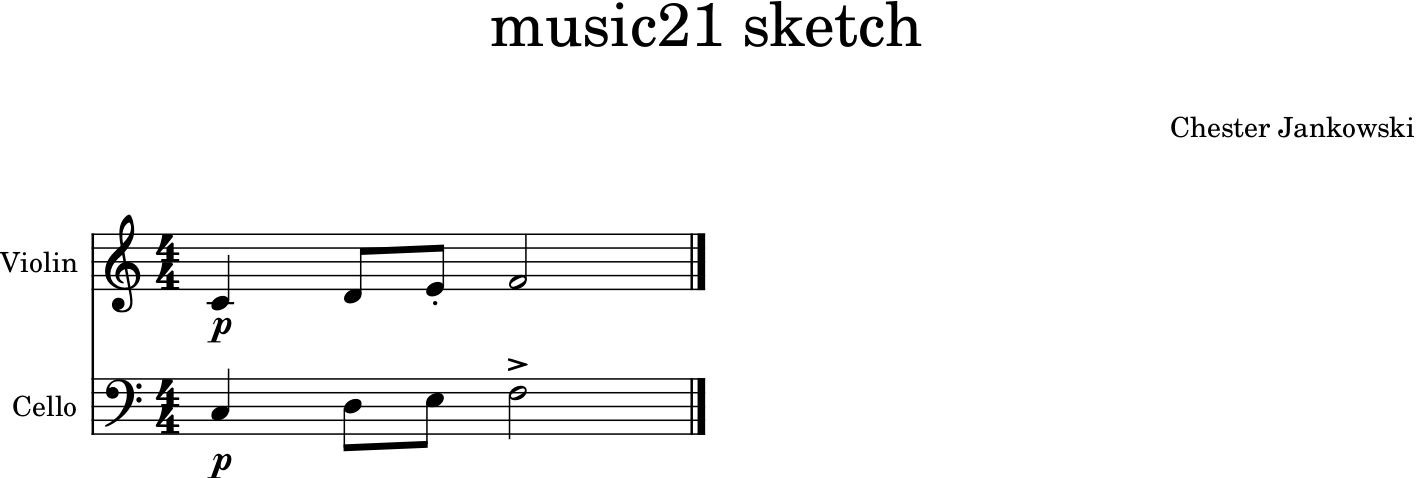

In [66]:
violin.insert(0, p)
cello.insert(0, p)
score.insert(0, meter.TimeSignature("2/4"))
score.insert(0, violin)
score.insert(0, cello)
score.show()